# Basic Example

This notebook follows the structure discussed in [https://luci-fitting.readthedocs.io/en/latest/example_basic.html](https://luci-fitting.readthedocs.io/en/latest/example_basic.html).

We will go through the steps necessary to use `LUCI`. As you will see, there are only a handful of commands required to use `LUCI`. I am intentionally being loquacious in this example since it is, after all, and example :) 

Let's start with importing `LUCI`. Just as described on the *readthedocs* page, we need to point our system path to our install location of the **LUCI** folder.

In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
import numpy as np
import matplotlib.pyplot as plt
from LuciBase import Luci
import LUCI.LuciPlotting as lplt

We now will set the required parameters. We are also going to be using our machine learning algorithm to get the initial guesses.

In [9]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/LUCI_test'  # Path to data cube
cube_name = 'NGC6946_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'NGC6946'
redshift = 0.000133  # Redshift of M33
resolution = 1000 # The actual resolution is 400, but we don't have machine learning algorithms for that resolution, so we use 1000

We intialize our LUCI object

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:01<00:00,  4.86it/s]


Let's quickly create a deep frame

In [4]:
# Create Deep Image
cube.create_deep_image()

100%|██████████| 10/10 [00:00<00:00, 46.19it/s]


Let's extract a background region and take a look at it. The background region is defined in a ds9 region file.

In [5]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|██████████| 2064/2064 [00:04<00:00, 420.26it/s]


We now fit part of our cube defined by the bounding box 500<x<1100 and 700<y<1300 with a Gaussian on the Halpha line, the NII-doublet, and the SII-doublet with a binning of 2. We will also tie all of our parameters together. We do not calculate the errors because that slows down calculations, but note that it can easily be done by adding the argument `uncertainty_bool=True`.

In [6]:
# Fit!
vel_map, broad_map, flux_map, chi2_fits = cube.fit_cube(['Halpha', 'NII6548', 'NII6583', 'SII6716', 'SII6731'], 'gaussian', 
                                                        [1,1,1,1,1], [1,1,1,1,1], 
                                                        500, 1100, 700, 1300, 
                                                        bkg=bkg_sky, binning=2,  
                                                        n_threads=1)

100%|██████████| 300/300 [17:27<00:00,  3.49s/it]


Let's take a look at the flux map for Halpha.

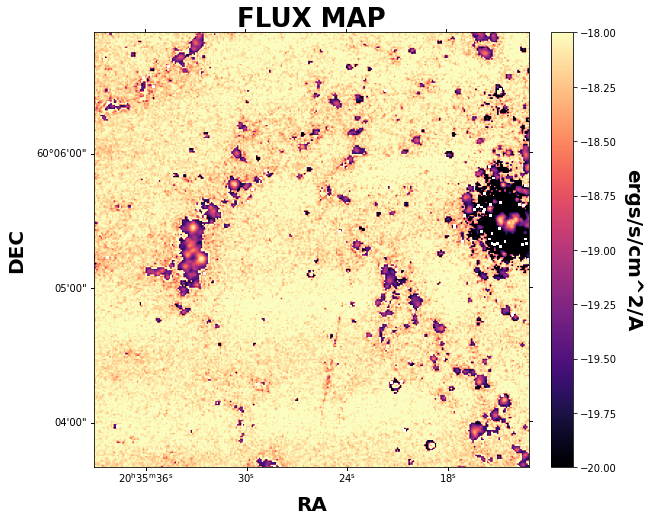

In [7]:
lplt.plot_map(np.log10(flux_map[:,:,0]), 'flux', cube_dir, cube.header, clims=[-20, -18])

We can also take a quick look at the velocity.

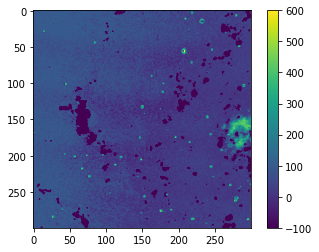

In [8]:
plt.imshow(vel_map[:,:,0])
plt.colorbar()
plt.clim(-100,600)